# Model CNN 
dataset : facial_expression

# Initialization

In [1]:
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, Model
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = "C:/Users/LENOVO/Documents/PKM/Project_PKM/CNN/facial_expression/res_new_dataset/train"
test_dir = "C:/Users/LENOVO/Documents/PKM/Project_PKM/CNN/facial_expression/res_new_dataset/test"

In [3]:
label = []
count = []
for dir in os.listdir(train_dir):
  label.append(dir)
  count.append(len(os.listdir(f'C:/Users/LENOVO/Documents/PKM/Project_PKM/CNN/facial_expression/res_new_dataset/train/{dir}')))
fig = px.bar(x=label, y=count)
fig.show()

In [4]:
label = []
count = []
for dir in os.listdir(test_dir):
  label.append(dir)
  count.append(len(os.listdir(f'C:/Users/LENOVO/Documents/PKM/Project_PKM/CNN/facial_expression/res_new_dataset/test/{dir}')))
fig = px.bar(x=label, y=count)
fig.show()

# Preprocessing

### Data Augmentation

#### Image Generator

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(120, 120),
        batch_size=256,
        color_mode = "grayscale",
        class_mode='categorical',
        shuffle=True)


validation_generator = validation_datagen.flow_from_directory(
        test_dir,
        target_size=(120, 120),
        batch_size=256,
        color_mode = "grayscale",
        class_mode='categorical',
        shuffle=False)

Found 17062 images belonging to 7 classes.
Found 4266 images belonging to 7 classes.


# Model

## Basic Architectures

In [5]:
model = Sequential([
    Conv2D(512, (5, 5), activation='relu', input_shape=(120, 120, 1)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])

c:\Users\LENOVO\Documents\PKM\Project_PKM\CNN\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 116, 116, 512)  │        13,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 58, 58, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 58, 58, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 58, 58, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 56, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,779,527 (6.79 MB)

 Trainable params: 1,777,607 (6.78 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [7]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    verbose=1,
)

Epoch 1/15


c:\Users\LENOVO\Documents\PKM\Project_PKM\CNN\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1067/1067 ━━━━━━━━━━━━━━━━━━━━ 3935s 4s/step - accuracy: 0.4142 - loss: 1.6368 - val_accuracy: 0.5263 - val_loss: 1.3700
Epoch 2/15
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 3588s 3s/step - accuracy: 0.5650 - loss: 1.1970 - val_accuracy: 0.5398 - val_loss: 1.2594
Epoch 3/15
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 3562s 3s/step - accuracy: 0.6169 - loss: 1.0343 - val_accuracy: 0.6296 - val_loss: 0.9853
Epoch 4/15
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 3616s 3s/step - accuracy: 0.6427 - loss: 0.9552 - val_accuracy: 0.6390 - val_loss: 0.9508
Epoch 5/15
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 3595s 3s/step - accuracy: 0.6736 - loss: 0.8718 - val_accuracy: 0.6575 - val_loss: 0.9121
Epoch 6/15
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 3627s 3s/step - accuracy: 0.6904 - loss: 0.8268 - val_accuracy: 0.6777 - val_loss: 0.8849
Epoch 7/15
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 3635s 3s/step - accuracy: 0.7121 - loss: 0.7738 - val_accuracy: 0.7070 - val_loss: 0.7918
Epoch 8/15
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 3668s 3s/step - accuracy: 0.7302 - loss: 0.73

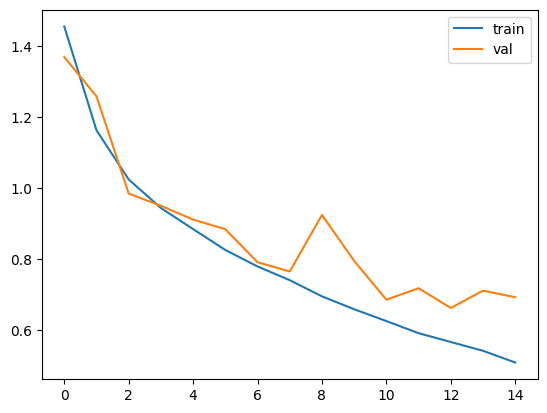

In [9]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

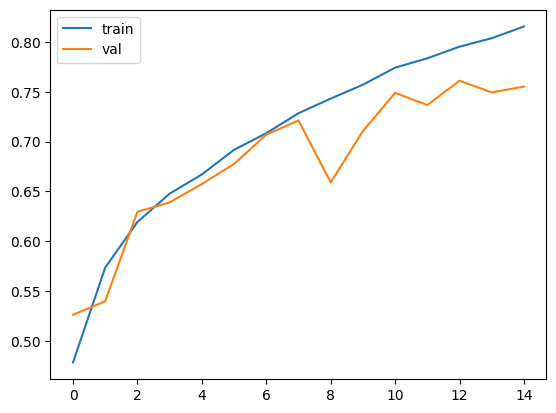

In [10]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [11]:
model.save('model_v1.2.h5')

## EmotionNano_B

In [7]:
def emotion_nano_model(input_shape=(120, 120, 1) , num_classes=7 ):
  ##
  filters1=[11,9,11,8,11,7,11,27]
  filters2=[27,19,27,26,27,36]
  filters3=[64,39,64,24,64]
  names0=['1','2','3','4','5','6','7','8']
  names1=['9','10','11','12','13','14']
  names2=['15','16','17','18','19','20']
  ##

  #fundmental block
  inputs = tf.keras.Input(shape=input_shape)
  layer1 = layers.Conv2D(filters1[0], 3 , activation='relu', padding='same',name=names0[0])(inputs)
  layer2 = layers.Conv2D(filters1[1], 3 , activation='relu', padding='same',name=names0[1])(layer1)
  layer3 = layers.Conv2D(filters1[2], 3 , activation='relu', padding='same',name=names0[2])(layer2)
  layer4 = layers.Conv2D(filters1[3], 3 , activation='relu', padding='same',name=names0[3])(layer1+layer3)
  layer5 = layers.Conv2D(filters1[4], 3 , activation='relu', padding='same',name=names0[4])(layer4)
  layer6 = layers.Conv2D(filters1[5], 3 , activation='relu', padding='same',name=names0[5])(layer1+layer3+layer5)
  layer7 = layers.Conv2D(filters1[6], 3 , activation='relu', padding='same',name=names0[6])(layer6)
  layer8 = layers.Conv2D(filters1[7], 3 , activation='relu', padding='same', strides=(2,2),name=names0[7])(layer1+layer5+layer7)

  #1x1 conv layer 1
  identity1 = layers.Conv2D(27,1,strides=(2,2), name='identity1')(layer1+layer3+layer5)


  #cNN Block 1
  layer1_c1 = layers.Conv2D(filters2[0], 3 , activation='relu', padding='same',name=names1[0])(layer8)
  layer2_c1 = layers.Conv2D(filters2[1], 3 , activation='relu', padding='same',name=names1[1])(layer1_c1+identity1)
  layer3_c1 = layers.Conv2D(filters2[2], 3 , activation='relu', padding='same',name=names1[2])(layer2_c1)
  layer4_c1 = layers.Conv2D(filters2[3], 3 , activation='relu', padding='same',name=names1[3])(layer3_c1+layer1_c1)
  layer5_c1 = layers.Conv2D(filters2[4], 3 , activation='relu', padding='same',name=names1[4])(layer4_c1)
  layer6_c1 = layers.Conv2D(filters2[5], 3 , activation='relu', padding='same',strides=(2,2),name=names1[5])(layer3_c1+layer5_c1+layer1_c1+identity1)


  #1x1 conv layer 2
  identity2 = layers.Conv2D(64,1,strides=(2,2), name='identity2')(layer3_c1 +layer5_c1+identity1 +layer8)


  #CNN Block 2
  layer1_c2 = layers.Conv2D(filters3[0], 3 , activation='relu', padding='same',name=names2[0])(layer6_c1)
  layer2_c2 = layers.Conv2D(filters3[1], 3 , activation='relu', padding='same',name=names2[1])(layer1_c2+identity2)
  layer3_c2 = layers.Conv2D(filters3[2], 3 , activation='relu', padding='same',name=names2[2])(layer2_c2)
  layer4_c2 = layers.Conv2D(filters3[3], 3 , activation='relu', padding='same',name=names2[3])(layer3_c2+layer1_c2+identity2)
  layer5_c2 = layers.Conv2D(filters3[4], 3 , activation='relu', padding='same',name=names2[4])(layer4_c2)
  layer6_c2 = layers.AveragePooling2D((12,12),name=names2[5])(layer3_c2+layer5_c2+layer1_c2+identity2)


  #dense 
  flatten = layers.Flatten()(layer6_c2)
  dense = layers.Dense(num_classes)(flatten)
  output= layers.Activation('softmax', name='softmax')(dense)
  model = Model(inputs= inputs , outputs= output)

  return model  

In [8]:
nanomodel= emotion_nano_model()
nanomodel.compile(
    optimizer= Adam(learning_rate=1e-3) ,
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
)
nanomodel.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 1 (Conv2D)          │ (None, 120, 120,  │        110 │ input_layer[0][0] │
│                     │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2 (Conv2D)          │ (None, 120, 120,  │        900 │ 1[0][0]           │
│                     │ 9)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 3 (Conv2D)          │ (None, 120, 120,  │        902 │ 2[0][0]           │
│                     │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 120, 120,  │          0 │ 1[0][0], 3[0][0]  │
│                     │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 4 (Conv2D)          │ (None, 120, 120,  │        800 │ add[0][0]         │
│                     │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 5 (Conv2D)          │ (None, 120, 120,  │        803 │ 4[0][0]           │
│                     │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 120, 120,  │          0 │ 1[0][0], 3[0][0]  │
│                     │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 120, 120,  │          0 │ add_1[0][0],      │
│                     │ 11)               │            │ 5[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 6 (Conv2D)          │ (None, 120, 120,  │        700 │ add_2[0][0]       │
│                     │ 7)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 120, 120,  │          0 │ 1[0][0], 5[0][0]  │
│                     │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 7 (Conv2D)          │ (None, 120, 120,  │        704 │ 6[0][0]           │
│                     │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 120, 120,  │          0 │ add_3[0][0],      │
│                     │ 11)               │            │ 7[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 120, 120,  │          0 │ 1[0][0], 3[0][0]  │
│                     │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 8 (Conv2D)          │ (None, 60, 60,    │      2,700 │ add_4[0][0]       │
│                     │ 27)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 120, 120,  │          0 │ add_5[0][0],      │
│                     │ 11)               │            │ 5[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 9 (Conv2D)          │ (None, 60, 60,    │      6,588 │ 8[0][0]         

 Total params: 142,442 (556.41 KB)

 Trainable params: 142,442 (556.41 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
def scheduler(epoch, lr):
  lr0=1e-3
  if epoch >=81 and epoch <121:
    return lr0*1e-1
  elif epoch >=121 and epoch <161:
    return lr0*1e-2
  elif epoch >=161 and epoch <181:
    return lr0*1e-3
  elif epoch >=181:
    return lr0*0.5*e-3
  else:
    return lr
  
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [10]:
nanomodel.fit(train_generator, validation_data=validation_generator, epochs=200, batch_size=100,
            callbacks=[callback], verbose=1)

Epoch 1/200


c:\Users\LENOVO\Documents\PKM\Project_PKM\CNN\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



67/67 ━━━━━━━━━━━━━━━━━━━━ 288s 4s/step - accuracy: 0.2240 - loss: 1.8692 - val_accuracy: 0.3209 - val_loss: 1.7373 - learning_rate: 0.0010
Epoch 2/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 287s 4s/step - accuracy: 0.3439 - loss: 1.7173 - val_accuracy: 0.3504 - val_loss: 1.6669 - learning_rate: 0.0010
Epoch 3/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 280s 4s/step - accuracy: 0.3984 - loss: 1.6329 - val_accuracy: 0.4519 - val_loss: 1.5383 - learning_rate: 0.0010
Epoch 4/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 281s 4s/step - accuracy: 0.4411 - loss: 1.5402 - val_accuracy: 0.4784 - val_loss: 1.4466 - learning_rate: 0.0010
Epoch 5/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 281s 4s/step - accuracy: 0.4773 - loss: 1.4571 - val_accuracy: 0.4918 - val_loss: 1.4340 - learning_rate: 0.0010
Epoch 6/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 279s 4s/step - accuracy: 0.5020 - loss: 1.3722 - val_accuracy: 0.5380 - val_loss: 1.2829 - learning_rate: 0.0010
Epoch 7/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 282s 4s/step - accuracy: 0.5253 - loss: 1.3159 - val_accuracy